## Theory 

First let's try an absorptive bistability. Let's consider the case of identical and lossless mirrors with some finite $R$ and transmittance $T$ and a cavity of length $l$. We'll consider a reflectivity of $R = |r|^2$ and $T = |t|^2$. For the sake of conservation, assuming losslessness, we have $R+T=1$. 

At the boundary stipulated by the first mirror, we will have a field that is given by
\begin{equation}
A_2 = tA_1 + rA'_2
\end{equation}
where $A'_2$ is the light reflecting back from the seond mirror and is given by
\begin{equation}
    A'_2 = rA_2\exp{(2ikl-\alpha l)}.
\end{equation}

This reduces to
\begin{equation}
A_2 = \frac{t A_1}{1-r^2\exp{(2ikl-\alpha l)}}.
\end{equation}

The absorptive coefficient $\alpha$ is the source of nonlinearity. It is a form of intensity independent bistability that is characterized by
\begin{equation}
    \alpha = \frac{\alpha_0}{1+I/I_s}
\end{equation}
where $\alpha_0$ is the low intensity absorption coefficient, $I_s$ is the saturation intensity. 
(https://www.rp-photonics.com/saturable_absorbers.html). 

If we take the mean field approach (homogenous spatial intensity of field in cavity), we have:
\begin{equation}
A_2 = \frac{tA_1}{1-R(1-\alpha l)}
\end{equation}
and by considering the intensity instead of the amplitude given by $I_i = 2n \epsilon_0 |A_i|^2$ where $i=1$ for the incident field and $i=2$ for the circulating field we have
\begin{equation}
I_2 = \frac{T I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

To get the transmitted field, which encodes our matrix after having seen the nonlinear activation function, we have
\begin{equation}
I_3 = \frac{T^2 I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

This is just for the resonant case, where the drive light frequency is on resonance with the cavity frequency. We will be more interested in the general case, since that will give us an additional DoF, the detuning $\delta$. 

For the non-resonant case, the detuning will show up as $r^2\exp{(2ikl)} = r^2e^{i\delta}$. We must then make the replacement:
\begin{equation}
A_2 = \frac{t A_1}{1-r^2e^{(i\delta- \alpha l)}}.
\end{equation}

Subsequently, the relation between $I_1$ and $I_2$ is given to be
\begin{equation}
T I_1 = I_2 \left[ 1 - 2 R \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right) \cos \delta + R^2 \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right)^2 \right].
\end{equation}
where we have defined the cooperativity $C_0 = \frac{R\alpha_0 l}{1-R}$. Then, we can find the outcoupled transmission to be
\begin{equation}
I_3 = I_2 \left[ 1 - 2 R \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right) \cos \delta + R^2 \left( 1 - \frac{C_0 T / R}{1 + \frac{2 I_2}{I_s}} \right)^2 \right].
\end{equation}

In terms of tuneable parameters, we have the detuning and possibly the reflection/transmission if there are some novel solid state technologies out there. We can also pick the material which will have a set $I_s$ and $\alpha_0$, but perhaps there are also novel technologies that allow those to be varied. We ought to look into that.

It should also be noted that the cooperativity $C_0$ can drastically change based off what types of cavities we have access to. I'm not certain what cooperativities are achieved by telecom cavities, so that will need to be researched more.

We can also engineer our cavities to have some explicit baseline T and R

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import root
import pychebfun
import sympy as sp


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

first analyze resonant case
\begin{equation}
I_2 = \frac{T I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

\begin{equation}
I_3 = \frac{T^2 I_1}{(1-R(1-\alpha l))^2}.
\end{equation}

Just to put in numbers, let's consider a quantum well with $\alpha_0 = 600$ cm^-1 and $I_s = 20$ mW/cm^2. Let's also consider a photonic crystal cavity with 2 micron length. We'll also use the cooperativity parameter so that our equations are rewritten to be

\begin{equation}
I_1 = TI_2\left(1+\frac{C_0}{1+2I_2/I_s}\right)^2
\end{equation}
where $C = \frac{C_0}{1+2I_2/I_s}$ and $C_0 = \frac{R\alpha_0 l}{1-R}$.

In [48]:
I_1_arr = np.linspace(0, 200, 2000) # let's work in mW
# start with a highly reflective cavity
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)
alpha_0 = 600 #cm-1
I_s = 2 # mW/cm^2
alpha = alpha_0 / (1 + I_1_arr/I_s)
l = 2e-3 #cm

C_0 = R*alpha_0*l/(1-R)
print("cooperativity: ", C_0)


cooperativity:  10.800000000000002


we'll need to solve the transcendental equation for I_2

In [49]:
def solve_I_2(I_1):
    def equation(I_2):
        return T * I_2 * (1 + (C_0 / (1 + (2 * I_2 / I_s))))**2 - I_1
    I2_solution = sp.optimize.fsolve(equation, 0.5)
    return I2_solution[0]

/var/folders/fb/88sx83xj1mqf426gdkwn8ll80000gn/T/ipykernel_80205/1309632119.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  I2_solution = sp.optimize.fsolve(equation, 0.5)
/var/folders/fb/88sx83xj1mqf426gdkwn8ll80000gn/T/ipykernel_80205/1309632119.py:4: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  I2_solution = sp.optimize.fsolve(equation, 0.5)


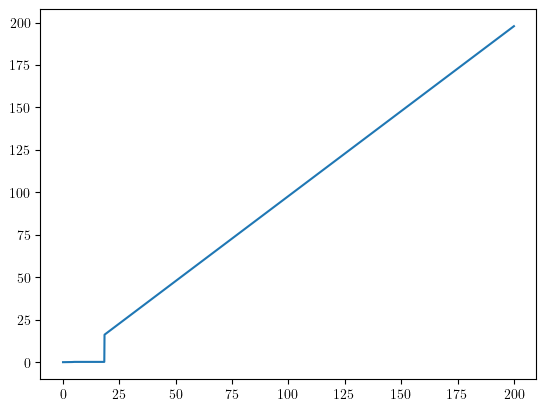

In [50]:
I_2_solutions = np.array([solve_I_2(I_1) for I_1 in I_1_arr])
I_3 = T * I_2_solutions
plt.plot(I_1_arr, I_3)

seems like convergence problems. let's try a more dynamic solver since the dynamic range is super high

In [51]:
def solve_I_2(I_1, C_0):
    def equation(I_2):
        return T * I_2 * (1 + C_0 / (1 + (2 * I_2 / I_s)))**2 - I_1
    
    lower_bound = 1e-6
    upper_bound = 500
    
    try:
        I_2_solution = sp.optimize.brentq(equation, lower_bound, upper_bound)
        print(I_2_solution)
        return I_2_solution
    except ValueError:
        return np.nan
I_2_solutions = np.array([solve_I_2(I_1, C_0) for I_1 in I_1_arr])



0.007281469893125918
0.01476131673604042
0.02244953134819487
0.03035685915318755
0.03849487751375408
0.04687608320552649
0.0555139916753376
0.06442325003982509
0.0736197661740941
0.08312085671868888
0.09294541743812323
0.10311412010907568
0.11364964106138316
0.12457692768917425
0.13592351077336542
0.14771987242135262
0.15999988196200984
0.17280131548688488
0.18616647909651626
0.2001429618131283
0.2147845520320883
0.23015236222912652
0.24631622163810887
0.2633564176799675
0.28136589696895403
0.3004530803156808
0.32074551060299666
0.34239464973396283
0.3655822912790904
0.390529294162239
0.41750773299043265
0.44685822083004784
0.47901532185962925
0.5145461117675939
0.5542111094256496
0.5990654653725722
0.6506378420382981
0.7112734069968422
9.273968129398318
11.622837291385618
13.372559143600142
14.907367224100947
16.324169039170954
17.664911519926807
18.952105932679952
20.199404192881378
21.415775200264314
22.607455495155346
23.77896998355125
24.93371211221094
26.074295149285845
27.202775

Text(0, 0.5, '$I_3 (mW/cm^2)$')

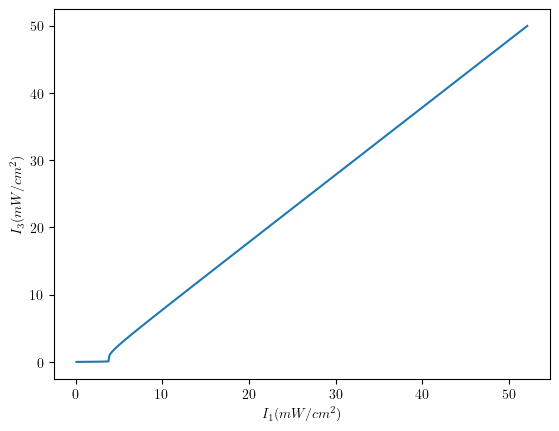

In [52]:
plt.plot(I_1_arr, T*I_2_solutions)
plt.xlabel("$I_1 (mW/cm^2)$")
plt.ylabel("$I_3 (mW/cm^2)$")

convergence seems good. now let's do this for a variety of cooperativity parameters

1.0005002501250626
2.0010005002501257
3.0015007503751883
4.00200100050025
5.002501250625313
6.0030015007503765
7.00350175087544
8.0040020010005
9.004502251125565
10.005002501250624
11.005502751375689
12.00600300150075
13.006503251625814
14.007003501750876
15.00750375187594
16.008004002001005
17.00850425212607
18.00900450225113
19.009504752376195
20.010005002501256
21.010505252626317
22.011005502751384
23.01150575287645
24.012006003001506
25.01250625312657
26.01300650325163
27.013506753376696
28.014007003501757
29.014507253626817
30.015007503751885
31.01550775387695
32.01600800400201
33.01650825412707
34.01700850425213
35.0175087543772
36.018009004502254
37.01850925462732
38.01900950475238
39.01950975487745
40.020010005002504
41.02051025512757
42.02101050525263
43.02151075537769
44.022011005502755
45.02251125562782
46.02301150575288
47.02351175587794
48.024012006003005
49.02451225612806
50.02501250625313
51.02551275637819
52.02601300650325
53.02651325662832
54.027013506753384
55.0275137

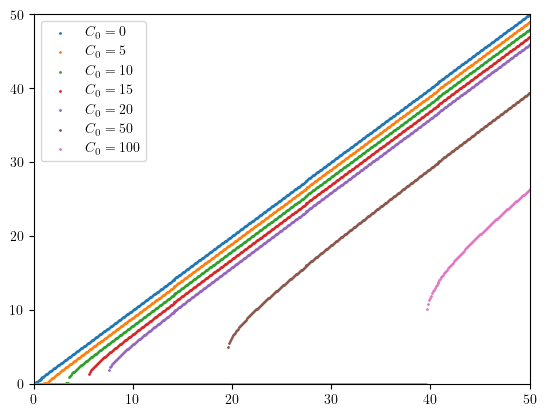

In [ ]:
C_0_arr = [0, 5, 10, 15, 20, 50, 100]
for C_0 in C_0_arr:
    I_2_solutions = np.array([solve_I_2(I_1, C_0) for I_1 in I_1_arr])
    plt.scatter(I_1_arr, T*I_2_solutions, s=1, label=f"$C_0 = {C_0}$")
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

some ReLu looking stuff but I'm pretty sure these aren't right - not getting any bistable points, just a discontinuity. Probably something is still wrong with the root finding... oh well, movoing on

## Kerr mediums

Let's also take a look at the effect with Kerr nonlinearity

\begin{equation}
T = \frac{1}{1 + F \sin^2(\delta_0 + \gamma I_i)} \tag{1}
\end{equation}

\begin{equation}
T = \frac{(1 - R)}{1 + R } \frac{I_i}{I_o}\tag{2}
\end{equation}

We'd like to have $T$ just in terms of $I_0$, the incident light. However, we have the intracavity intensity $I_i$ as a variable, which is not so easily accessed. Let's first just plot things and solve the equation by analyzing the intersections of our plotted data.

For experimental platforms, we will primarily need to select the kerr media, which will have a different $\Delta n$ based off what the material is. This will have an effect on $\delta = \frac{4 \pi}{\lambda} L (n_0 + n_2 I_i)$. We will also want to pick some cavity with reflectivity and finesse that suits our application.

Text(0, 0.5, '$T$ (a.u.)')

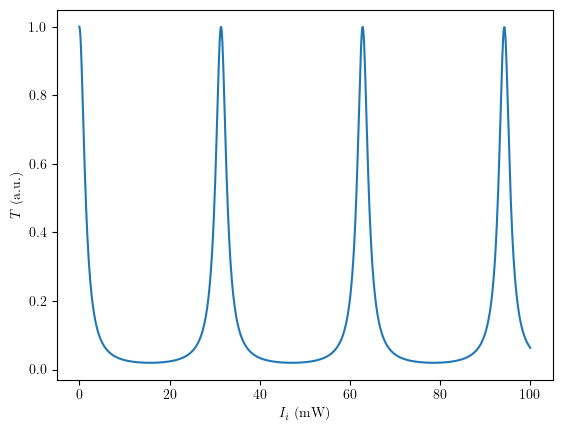

In [63]:
F = 50
delta = 0
gamma = 0.1
I_i = np.linspace(0,100,1000)
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)
plt.plot(I_i, T)
plt.xlabel("$I_i$ (mW)")
plt.ylabel("$T$ (a.u.)")

Good we see cavity FSRs as expected. 

In [72]:
# Define the symbols
T, F, delta_0, gamma, I_i, I_o, R = sp.symbols('T F delta_0 gamma I_i I_o R')

# Define the equations
eq1 = sp.Eq(T, 1 / (1 + F * sp.sin(delta_0 + gamma * I_i)**2))
eq2 = sp.Eq(T, ((1 - R) / (1 + R)) * (I_i / I_o))

# Solve eq2 for I_i
I_i_solution = sp.solve(eq2, I_i)[0]

# Substitute I_i_solution into eq1
T_solution = eq1.subs(I_i, I_i_solution)

# Simplify the expression
T_solution_simplified = sp.simplify(T_solution)

# Display the result
sp.pretty_print(T_solution_simplified)

                       1                   
T = ───────────────────────────────────────
         2⎛Iₒ⋅T⋅γ⋅(R + 1) - δ₀⋅(R - 1)⎞    
    F⋅sin ⎜───────────────────────────⎟ + 1
          ⎝           R - 1           ⎠    


We have the transcendental equation
\begin{equation}
T = \frac{1}{F \sin^2(\frac{I_0 T \gamma (R+1) - \delta_0 (R-1)}{R-1})+1}
\end{equation}

Let's try and solve this graphically instead

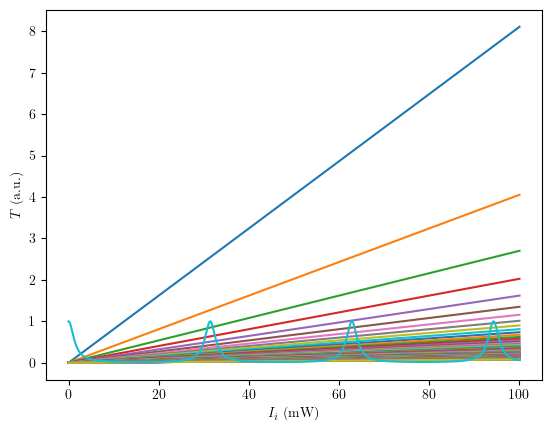

In [64]:
I_0_arr = np.arange(1, 100, 1)
R = 0.85
T2_vals = []

for I_0 in I_0_arr:
    T2 = (1-R)/(1+R) * (I_i / I_0)
    T2_vals.append(T2)
    plt.plot(I_i, T2)
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)
plt.plot(I_i, T)
plt.xlabel("$I_i$ (mW)")
plt.ylabel("$T$ (a.u.)")
plt.show()

we can now find the intersections between the plots to construct $I_0$ vs. $I_{out}$. These will correspond to input $I_0$ values that correspond to points of stability.